# Review data and create data loader

In [1]:
# download data

In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-01-27 16:31:23--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  2.85MB/s    in 0.4s    

2023-01-27 16:31:23 (2.85 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [3]:
mv input.txt ../data/

In [4]:
# read on review data

In [5]:
with open('../data/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [6]:
text[0:200]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you'

In [7]:
print(text[0:200])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


In [8]:
# Here is all unique character that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [9]:
# create a mapping from characters to integers
ctoi = {c: i for i, c in enumerate(chars)}
itoc = {i: c for i, c in enumerate(chars)}

encode = lambda s: [ctoi[c] for c in s]
decode = lambda l: ''.join([itoc[i] for i in l])

print(encode("hi there"))

print(decode(encode("hi there")))

[46, 47, 1, 58, 46, 43, 56, 43]
hi there


In [10]:
# Let now encode the entire text dataset and store it into torch.Tensor
import torch

data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)

data[0:100]

torch.Size([1115394]) torch.int64


tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])

In [11]:
# Let's now split up the data into train set and validation set
n = round(len(data) * 0.9);
train_data = data[:n]
val_data   = data[n:]
len(train_data), len(val_data)

(1003855, 111539)

In [12]:
block_size = 8
train_data[:block_size]

tensor([18, 47, 56, 57, 58,  1, 15, 47])

In [13]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

for i in range(block_size):
    context = x[:i+1]
    target = y[i]
    print(f"when context is {context} the target: {target}.")

when context is tensor([18]) the target: 47.
when context is tensor([18, 47]) the target: 56.
when context is tensor([18, 47, 56]) the target: 57.
when context is tensor([18, 47, 56, 57]) the target: 58.
when context is tensor([18, 47, 56, 57, 58]) the target: 1.
when context is tensor([18, 47, 56, 57, 58,  1]) the target: 15.
when context is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47.
when context is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58.


In [14]:
torch.manual_seed(1337)

batch_size = 4
block_size = 8

def get_batch(split='train'):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(train_data) - block_size, (batch_size, ))
    xb = torch.stack([train_data[i:i+block_size] for i in ix])
    yb = torch.stack([train_data[i+1:i+1+block_size] for i in ix])
    return xb, yb

xb, yb = get_batch()
print(xb)
print(yb)
for b in range(batch_size):
    for i in range(block_size):
        x = xb[b,:i+1]
        y = yb[b,i]
        print(f"when context is {x} the target: {y}.")

tensor([[56,  6,  0, 24, 43, 58,  1, 61],
        [39, 47, 51,  1, 58, 46, 39, 58],
        [52, 45,  1, 58, 53,  1, 57, 39],
        [43, 47, 52, 45,  1, 46, 53, 50]])
tensor([[ 6,  0, 24, 43, 58,  1, 61, 46],
        [47, 51,  1, 58, 46, 39, 58,  1],
        [45,  1, 58, 53,  1, 57, 39, 63],
        [47, 52, 45,  1, 46, 53, 50, 47]])
when context is tensor([56]) the target: 6.
when context is tensor([56,  6]) the target: 0.
when context is tensor([56,  6,  0]) the target: 24.
when context is tensor([56,  6,  0, 24]) the target: 43.
when context is tensor([56,  6,  0, 24, 43]) the target: 58.
when context is tensor([56,  6,  0, 24, 43, 58]) the target: 1.
when context is tensor([56,  6,  0, 24, 43, 58,  1]) the target: 61.
when context is tensor([56,  6,  0, 24, 43, 58,  1, 61]) the target: 46.
when context is tensor([39]) the target: 47.
when context is tensor([39, 47]) the target: 51.
when context is tensor([39, 47, 51]) the target: 1.
when context is tensor([39, 47, 51,  1]) the ta

In [15]:
print(xb) # input to our transformer

tensor([[56,  6,  0, 24, 43, 58,  1, 61],
        [39, 47, 51,  1, 58, 46, 39, 58],
        [52, 45,  1, 58, 53,  1, 57, 39],
        [43, 47, 52, 45,  1, 46, 53, 50]])


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1337)

# bigram language model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, idx, targets=None):
        logits = self.token_embedding_table(idx)
        if targets is not None:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        else:
            loss = None
        return loss, logits

    @torch.no_grad()
    def generate(self, idx, max_new_token):
        for i in range(max_new_token):
            loss, logits = model(idx[-block_size:])
            logits = logits[:, -1,:]
            probs = F.softmax(logits, -1)
            next_idx = torch.multinomial(probs, 1)
            idx = torch.cat([idx, next_idx], 1)
        return idx

model = BigramLanguageModel(vocab_size)
loss, logits = model(xb, yb)
print(loss)

tensor(4.6437, grad_fn=<NllLossBackward0>)


In [17]:
sent = model.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_token=1000)
print(decode(sent[0].tolist()))


SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJt-wBpm&yiltNCjeO3:Cx&vvMYW-txjuAd IRFbTpJ$zkZelxZtTlHNzdXXUiQQY:qFINTOBNLI,&oTigq z.c:Cq,SDXzetn3XVjX-YBcHAUhk&PHdhcOb
nhJ?FJU?pRiOLQeUN!BxjPLiq-GJdUV'hsnla!murI!IM?SPNPq?VgC'R
pD3cLv-bxn-tL!upg
SZ!Uvdg CtxtT?hsiW:XxKIiPlagHIsr'zKSVxza?GlDWObPmRJgrIAcmspmZ&viCKot:u3qYXA:rZgv f:3Q-oiwUzqh'Z!I'zRS3SP rVchSFUIdd q?sPJpUdhMCK$VXXevXJFMl,i
YxA:gWId,EXR,iMC,$?srV$VztRwb?KpgUWFjR$zChOLm;JrDnDph
LBj,KZxJaLPgBAkyzEzSiiQb
jkSVyb$vvyQFuAUAKuzdZAJktRqUiAcPBa;AgJ;.$l3Pu!.IErMfN!PmuQbvx
xMkttN:PmJh'wNC
AUI?wNCphq-.IsCwbjxca;P-KA:r'a;pJ&q-UgOEX.cAO-p,lQ?nEsrlvmUgbEQLQh,j;iPlgZR:CJpxIBju f&!BBEHSPmnq,P -d
pjuWDPLFa!ByCSjJuERtKpph.ZP  CUEsiy'FjF$$-rJUQ?uApxlxlYe
yASBoipGLwfXelgY!a fyFPJX!JDWCoAXRJJFJOlxlvpR?OXYddZAXzkIBtp3d,vAcPlgX'pM fNMLphx&flaAcL!3F.?sBiRwLTqHzot.ttRF$Fv'bL:&x&ayFVqVAHqHxv3QzteqbcUJnERZYGwzLd,rgf&yCnERErI.IVZ WddEJAX CO'Eu!I!Lg:i-$ mIc.
xJjdLEJXVTb?Eqf IgCJcUGNSBZ3dbsEXgCPmr'XxxDXXxE

In [18]:
# create pytorch optimizer
from torch.optim import AdamW
import numpy as np


optimizer = AdamW(model.parameters())


At g ksentheateshanemowispacthe
O: us,

WANGournodofs.
Prillvee.
FONGous d ve whe,
An.
CKI the y niff dy!
Whitariravif litourso om

Dulidakemereeliny y,

CUSpthe mpu;
te, in,
Fieserin t tho bulla dang BRWhith's ensat is hourt be DYe; nore Bod forse, ur, bothave ge.
pore to oitim'lces:

RD t ore athempsie f upecelise hassh s!UCon ad faler iceale wain athig ta hod kne:
TENDWend tein ly omy Dundis, rinthalld athakingans; IO mingeserd nther on teqMar! st ms my w your y ficorop-may:
ARalt y nooun ast


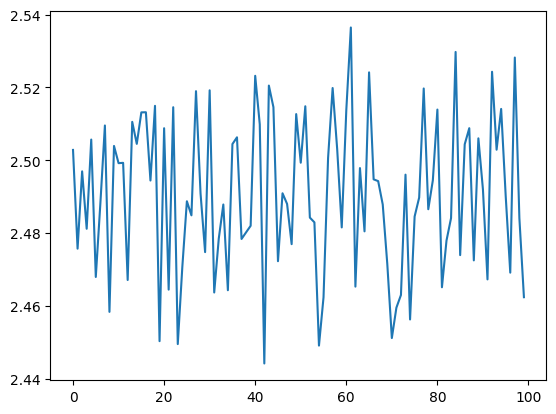

In [20]:
# do optimize
def train(n_iter=10000):
    batch_size = 32
    losses = []
    for _ in range(n_iter):
        xb, yb = get_batch()
        loss, logits = model(xb, yb)
        losses.append(loss)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()
    return losses
losses = train(n_iter=10000)
from matplotlib import pyplot
with torch.no_grad():
    y = torch.tensor(losses).view(100, -1).mean(0)
    pyplot.plot(range(len(y)), y)
    
sent = model.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_token=500)
print(decode(sent[0].tolist()))


Whart lind yof Iniloucisas ndor:
Thal pe's, pe t chthay arvande; vos ous panue ad inghndl ang:
che wag gind t-llse?
Het cilly's hat hn jof CARWhe bithas che p fe: wenghanbyam sy fthenlme be,
Tut ordesssithe athethink.
cepurevor min.
Holit: bor INoyorhe;
TEETha y,
D ICI thed
SHMENond thorerd tstron th focke' s ched couno he acethod fo ty whemis floueftitho chald ikin'dind; we athithoundre intarchyecarin,

INIComy, s t, akiaucouronowore ISe'l!
METEE:
TE: Wandll naganithil yes, meayoe f tory iveth 


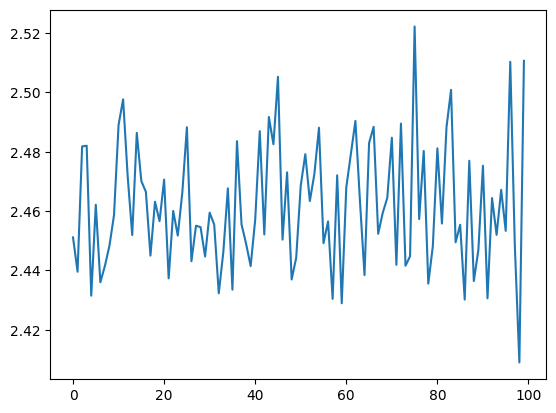

In [21]:
losses = train(n_iter=10000)
from matplotlib import pyplot
with torch.no_grad():
    y = torch.tensor(losses).view(100, -1).mean(0)
    pyplot.plot(range(len(y)), y)
    
sent = model.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_token=500)
print(decode(sent[0].tolist()))

### Convert this file to md

In [22]:
from IPython.core.display import Javascript

In [23]:
%%js
IPython.notebook.kernel.execute('this_notebook = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [24]:
this_notebook

'2023-01-27-data-loader-for-attention-layer.ipynb'

In [25]:
!jupyter nbconvert --to markdown {this_notebook} --output-dir=../_posts

[NbConvertApp] Converting notebook 2023-01-27-data-loader-for-attention-layer.ipynb to markdown
[NbConvertApp] Writing 11339 bytes to ../_posts/2023-01-27-data-loader-for-attention-layer.md
